# Подключение библиотек и задание входных данных

In [374]:
import matplotlib.pyplot as plt
import scipy.fft as sp
import math
import cmath
from prettytable import PrettyTable

q = 8
sw = True

N = 16
filter = 10000
A = [1,5,3,7,3,2,1]
f = [0.5,1,2,5,7,9,12]

samples = range(0,N)

k = 7
pi = math.pi

f = [i*1000 for i in f]

# Расчёт изначального сигнала и преобразование до целых чисел

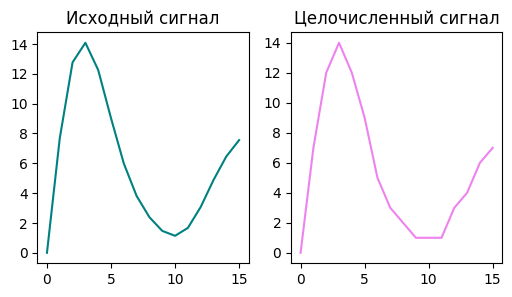

0
14


In [375]:
fd = 75000
if max(f) > 30000:
    fd = 110000
Td = 1/fd

t = []
x = []

for n in samples:
    t.append(n * Td)
    x.append(0)
    for i in range(0,k):
        x[n] += A[i] * math.sin(2*pi*f[i]*t[n])

x_old = x

x = [int(i) for i in x]

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(6, 3))

axs[0].set_title("Исходный сигнал")
axs[0].plot(samples, x_old, 'teal')

axs[1].set_title("Целочисленный сигнал")
axs[1].plot(samples, x, 'violet')

if sw:
    plt.show()

print(min(x))
print(max(x))

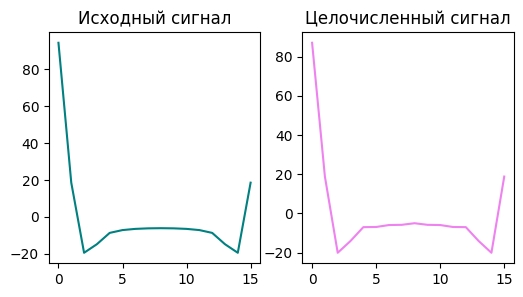

In [376]:
fftx_old = x_old
fftx = x

fftx_old = sp.fft(fftx_old)

fftx = sp.fft(fftx)

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(6, 3))

axs[0].set_title("Исходный сигнал")
axs[0].plot(samples, fftx_old, 'teal')

axs[1].set_title("Целочисленный сигнал")
axs[1].plot(samples, fftx, 'violet')

if sw:
    plt.show()


# Натягивание совы на глобус

In [377]:
D = 2**q

def Wf(x):
    return ((math.e**(-(cmath.sqrt(-1)*2*(pi/N)*x))))

def Wf_2(x):
    d = ((math.e**(-(cmath.sqrt(-1)*2*(pi/N)*x))))*D/2
    if d.real == 128:
        d = complex(127,d.imag)
    if d.imag == 128:
        d = complex(d.real,127)
    return d

ws_old = [Wf(i) for i in range(0,N//2)]
ws = [Wf_2(i) for i in range(0,N//2)]

print(ws_old)
print(ws)

def Bab(A,B,W):
    # print(W)
    return [A+B*W,A-B*W]

def compSum(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a + c,b + d)

def compSub(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a - c,b - d)

def compMul(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag
    
    return complex(a*c-b*d,a*d+b*c) / (D/2)

def Bab_2(A,B,W):
    return [compSum(A,compMul(B,W)),compSub(A,compMul(B,W))]

def BabL(AB,k):
    AB_out = [0 for i in range(0,len(AB))]
    lenH = len(AB)//2
    for i in range(0,lenH):
        AB_out[i],AB_out[i+lenH] = Bab(AB[i],AB[i+lenH],ws_old[k])
    return AB_out

def Babl_2(AB,k):
    AB_out = [0 for i in range(0,len(AB))]
    lenH = len(AB)//2
    for i in range(0,lenH):
        AB_out[i],AB_out[i+lenH] = Bab_2(AB[i],AB[i+lenH],ws[k])
    return AB_out

[(1+0j), (0.9238795325112867-0.3826834323650898j), (0.7071067811865476-0.7071067811865475j), (0.38268343236508984-0.9238795325112867j), (6.123233995736766e-17-1j), (-0.3826834323650897-0.9238795325112867j), (-0.7071067811865475-0.7071067811865476j), (-0.9238795325112867-0.3826834323650899j)]
[(127+0j), (118.2565801614447-48.98347934273149j), (90.50966799187809-90.50966799187808j), (48.9834793427315-118.2565801614447j), (7.83773951454306e-15-128j), (-48.983479342731485-118.2565801614447j), (-90.50966799187808-90.50966799187809j), (-118.2565801614447-48.983479342731506j)]


# Бабочки

Изначальная

In [378]:
gen_old = []
gen_old.append(x_old)

gen_old.append(BabL(gen_old[0],0))

gen_old.append([0 for i in gen_old[1]])

gen_old[2][:8] = BabL(gen_old[1][0:8],0)
gen_old[2][8:] = BabL(gen_old[1][8:],4)

gen_old.append([0 for i in gen_old[2]])

gen_old[3][:4] = BabL(gen_old[2][:4],0)
gen_old[3][4:8] = BabL(gen_old[2][4:8],4)
gen_old[3][8:12] = BabL(gen_old[2][8:12],2)
gen_old[3][12:] = BabL(gen_old[2][12:],6)

gen_old.append([0 for i in gen_old[3]])

gen_old[4][:2] = BabL(gen_old[3][:2],0)
gen_old[4][2:4] = BabL(gen_old[3][2:4],4)
gen_old[4][4:6] = BabL(gen_old[3][4:6],2)
gen_old[4][6:8] = BabL(gen_old[3][6:8],6)
gen_old[4][8:10] = BabL(gen_old[3][8:10],1)
gen_old[4][10:12] = BabL(gen_old[3][10:12],5)
gen_old[4][12:14] = BabL(gen_old[3][12:14],3)
gen_old[4][14:] = BabL(gen_old[3][14:],7)

ts_old = [gen_old[4][0],gen_old[4][8],gen_old[4][4],gen_old[4][12],gen_old[4][2],gen_old[4][10],gen_old[4][6],gen_old[4][14],gen_old[4][1],gen_old[4][9],gen_old[4][5],gen_old[4][13],gen_old[4][3],gen_old[4][11],gen_old[4][7],gen_old[4][15]]

Новая

In [379]:
gen = []
gen.append(x)

gen.append(Babl_2(gen[0],0))

gen.append([0 for i in gen[1]])

gen[2][:8] = Babl_2(gen[1][0:8],0)
gen[2][8:] = Babl_2(gen[1][8:],4)

gen.append([0 for i in gen[2]])

gen[3][:4] = Babl_2(gen[2][:4],0)
gen[3][4:8] = Babl_2(gen[2][4:8],4)
gen[3][8:12] = Babl_2(gen[2][8:12],2)
gen[3][12:] = Babl_2(gen[2][12:],6)

gen.append([0 for i in gen[3]])

gen[4][:2] = Babl_2(gen[3][:2],0)
gen[4][2:4] = Babl_2(gen[3][2:4],4)
gen[4][4:6] = Babl_2(gen[3][4:6],2)
gen[4][6:8] = Babl_2(gen[3][6:8],6)
gen[4][8:10] = Babl_2(gen[3][8:10],1)
gen[4][10:12] = Babl_2(gen[3][10:12],5)
gen[4][12:14] = Babl_2(gen[3][12:14],3)
gen[4][14:] = Babl_2(gen[3][14:],7)

ts = [gen[4][0],gen[4][8],gen[4][4],gen[4][12],gen[4][2],gen[4][10],gen[4][6],gen[4][14],gen[4][1],gen[4][9],gen[4][5],gen[4][13],gen[4][3],gen[4][11],gen[4][7],gen[4][15]]

# Выводы бпф

+-------+-------------+-------------+-----------------+------------------+------------------+
| Номер |    Итер 1   |    Итер 2   |      Итер 3     |      Итер 4      |      Итер 5      |
+-------+-------------+-------------+-----------------+------------------+------------------+
|   0   |      0j     |  (2.386+0j) |   (17.714+0j)   |   (44.071+0j)    |   (94.245+0j)    |
|   1   |  (7.681+0j) |  (9.15+0j)  |   (23.057+0j)   |   (50.174+0j)    |   (-6.103+0j)    |
|   2   | (12.773+0j) | (13.911+0j) |   (26.357+0j)   |   (-8.643+0j)    | (-8.643+4.059j)  |
|   3   | (14.085+0j) | (15.752+0j) |   (27.117+0j)   |   (-4.059+0j)    | (-8.643-4.059j)  |
|   4   |  (12.26+0j) | (15.328+0j) |   (-12.943+0j)  | (-12.943-1.464j) | (-19.408-1.203j) |
|   5   |  (9.03+0j)  | (13.907+0j) |   (-4.757+0j)   | (-4.757-4.387j)  | (-6.477-1.726j)  |
|   6   |  (5.987+0j) | (12.446+0j) |    (1.464+0j)   | (-12.943+1.464j) | (-6.477+1.726j)  |
|   7   |  (3.809+0j) | (11.365+0j) |    (4.387+0j)   | (-4.

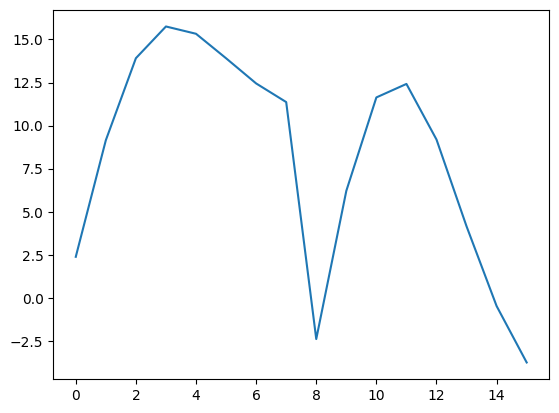

In [380]:
def listround(l,r):
    return [complex(round(i.real,r),round(i.imag,r)) for i in l]

table1 = PrettyTable()


table1.add_column('Номер',range(0,16))

table1.add_column('Итер 1',listround(gen_old[0],3))
table1.add_column('Итер 2',listround(gen_old[1],3))
table1.add_column('Итер 3',listround(gen_old[2],3))
table1.add_column('Итер 4',listround(gen_old[3],3))
table1.add_column('Итер 5',listround(gen_old[4],3))

print(table1)

plt.plot(samples,gen_old[1])



In [381]:
table1 = PrettyTable()
table1.add_column("id",range(0,8))
table1.add_column("ws",ws_old)

print(table1)

table1 = PrettyTable()
table1.add_column("id",range(0,8))
table1.add_column("ws",ws)

print(table1)

table1 = PrettyTable()

table1.add_column("a",listround(gen_old[0][:8],3))
table1.add_column("b",listround(gen_old[0][8:],3))

print(table1)

+----+-------------------------------------------+
| id |                     ws                    |
+----+-------------------------------------------+
| 0  |                   (1+0j)                  |
| 1  |  (0.9238795325112867-0.3826834323650898j) |
| 2  |  (0.7071067811865476-0.7071067811865475j) |
| 3  | (0.38268343236508984-0.9238795325112867j) |
| 4  |         (6.123233995736766e-17-1j)        |
| 5  | (-0.3826834323650897-0.9238795325112867j) |
| 6  | (-0.7071067811865475-0.7071067811865476j) |
| 7  | (-0.9238795325112867-0.3826834323650899j) |
+----+-------------------------------------------+
+----+------------------------------------------+
| id |                    ws                    |
+----+------------------------------------------+
| 0  |                 (127+0j)                 |
| 1  |  (118.2565801614447-48.98347934273149j)  |
| 2  |  (90.50966799187809-90.50966799187808j)  |
| 3  |  (48.9834793427315-118.2565801614447j)   |
| 4  |       (7.83773951454306e-15-128

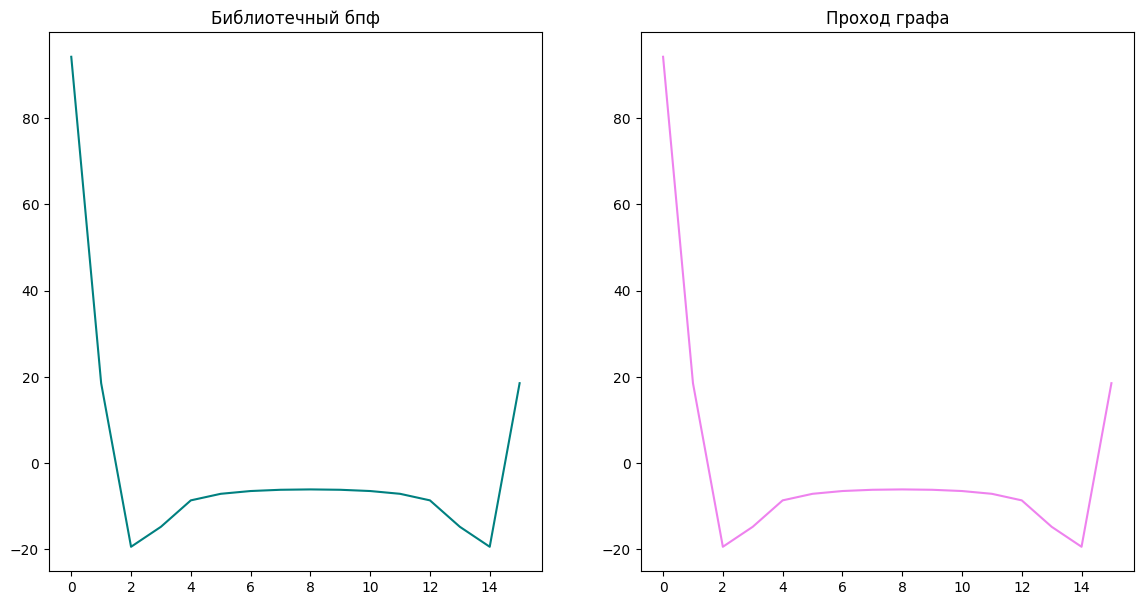

In [382]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(14, 7))

axs[0].set_title("Библиотечный бпф")
axs[0].plot(samples, fftx_old, 'teal')

axs[1].set_title("Проход графа")
axs[1].plot(samples, ts_old, 'violet')

In [383]:
table2 = PrettyTable()

table2.add_column('Номер',range(0,16))
table2.add_column('Итер 1',listround(gen[0],3))
table2.add_column('Итер 2',listround(gen[1],3))
table2.add_column('Итер 3',listround(gen[2],3))
table2.add_column('Итер 4',listround(gen[3],3))
table2.add_column('Итер 5',listround(gen[4],3))

print(table2)

+-------+---------+-------------+-----------------+------------------+------------------+
| Номер |  Итер 1 |    Итер 2   |      Итер 3     |      Итер 4      |      Итер 5      |
+-------+---------+-------------+-----------------+------------------+------------------+
|   0   |    0j   |  (1.984+0j) |   (16.844+0j)   |   (40.517+0j)    |   (85.687+0j)    |
|   1   |  (7+0j) |  (7.992+0j) |    (20.86+0j)   |   (45.525+0j)    |   (-4.652+0j)    |
|   2   | (12+0j) | (12.992+0j) |    (23.86+0j)   |   (-6.829+0j)    | (-6.829+3.806j)  |
|   3   | (14+0j) | (14.992+0j) |    (24.86+0j)   |   (-3.806+0j)    | (-6.829-3.806j)  |
|   4   | (12+0j) | (14.977+0j) |   (-12.875+0j)  | (-12.875-2.125j) | (-19.946-2.301j) |
|   5   |  (9+0j) | (12.969+0j) |   (-4.875+0j)   | (-4.875-5.125j)  | (-5.804-1.948j)  |
|   6   |  (5+0j) | (10.953+0j) |    (2.125+0j)   | (-12.875+2.125j) | (-5.804+1.948j)  |
|   7   |  (3+0j) |  (9.945+0j) |    (5.125+0j)   | (-4.875+5.125j)  | (-19.946+2.301j) |
|   8   | 

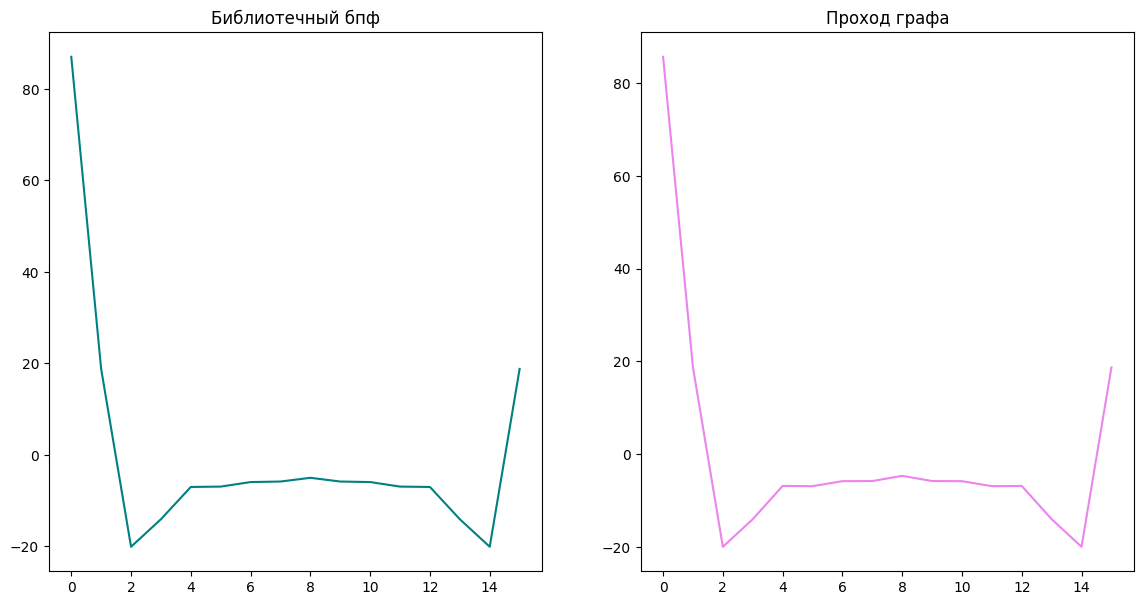

In [384]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(14, 7))

axs[0].set_title("Библиотечный бпф")
axs[0].plot(samples, fftx, 'teal')

axs[1].set_title("Проход графа")
axs[1].plot(samples, ts, 'violet')

# Графики

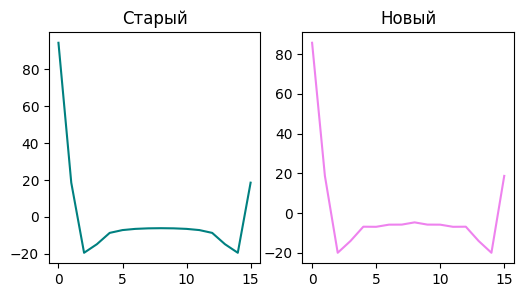

In [385]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(6, 3))

axs[0].set_title("Старый")
axs[0].plot(samples, ts_old, 'teal')

axs[1].set_title("Новый")
axs[1].plot(samples, ts, 'violet')

In [386]:
print(ts_old)
print(ts)

[(94.24499216382674+0j), (18.537832117423317-33.33797581024977j), (-19.40827407410862-1.2026225436570694j), (-14.770215590701817+5.360963009309813j), (-8.643148637711125+4.059118308494217j), (-7.122048604005636+2.765169899933441j), (-6.477445124033034+1.7255445576014656j), (-6.18767131071484+0.8308481126762999j), (-6.103049716123223+0j), (-6.187671310714844-0.8308481126763034j), (-6.477445124033034-1.7255445576014647j), (-7.122048604005633-2.76516989993344j), (-8.643148637711125-4.059118308494217j), (-14.770215590701815-5.360963009309818j), (-19.40827407410862+1.2026225436570686j), (18.537832117423306+33.33797581024978j)]
[(85.68680861219764+0j), (18.72127180359953-33.58838042265649j), (-19.9461214422156-2.3009357422575105j), (-14.002521811386746+6.911448604382232j), (-6.829403877258301+3.8059659004211426j), (-6.881548219810195+3.0840490323054626j), (-5.8042447687219+1.9483318358674904j), (-5.774701772402592-1.3220299947332705j), (-4.652268435806036+0j), (-5.77470177240259+1.3220299947

[0, 7, 12, 14, 12, 9, 5, 3, 2, 1, 1, 1, 3, 4, 6, 7]
+----+-------------+---------+
| id |      py     |    qu   |
+----+-------------+---------+
| 0  |  (1.984+0j) |  (1+0j) |
| 1  |  (7.992+0j) |  (7+0j) |
| 2  | (12.992+0j) | (12+0j) |
| 3  | (14.992+0j) | (14+0j) |
| 4  | (14.977+0j) | (14+0j) |
| 5  | (12.969+0j) | (12+0j) |
| 6  | (10.953+0j) | (10+0j) |
| 7  |  (9.945+0j) |  (9+0j) |
| 8  | (-1.984+0j) | (-1+0j) |
| 9  |  (6.008+0j) |  (7+0j) |
| 10 | (11.008+0j) | (12+0j) |
| 11 | (13.008+0j) | (14+0j) |
| 12 |  (9.023+0j) | (10+0j) |
| 13 |  (5.031+0j) |  (6+0j) |
| 14 | (-0.953+0j) |    0j   |
| 15 | (-3.945+0j) | (-3+0j) |
+----+-------------+---------+


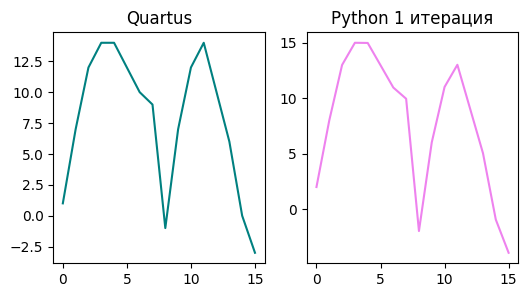

In [387]:


# quartus = [
#     complex(127,0),
#     complex(66,-25),
#     complex(57,-45),
#     complex(38,-59),
#     complex(12,64),
#     complex(-89,20),
#     complex(-9,-14),
#     complex(102,84),

#     complex(-127,0),
#     complex(-52,25),
#     complex(-33,45),
#     complex(-10,59),
#     complex(12,-64),
#     complex(107,-20),
#     complex(19,14),
#     complex(-96,-84),
# ]

# quartus = [
#     complex(1,0),
#     complex(7,-1),
#     complex(12,-1),
#     complex(14,-1),
#     complex(12,-3),
#     complex(7,-4),
#     complex(0,-5),
#     complex(-4,-3),

#     complex(-1,0),
#     complex(7,-1),
#     complex(12,1),
#     complex(14,1),
#     complex(12,3),
#     complex(11,4),
#     complex(10,5),
#     complex(10,3),
# ]

quartus = [
    complex(1,0),
    complex(7,0),
    complex(12,0),
    complex(14,0),
    complex(14,0),
    complex(12,0),
    complex(10,0),
    complex(9,0),

    complex(-1,0),
    complex(7,0),
    complex(12,0),
    complex(14,0),
    complex(10,0),
    complex(6,0),
    complex(0,0),
    complex(-3,0),
]

# quartus = [complex(-1*i.real,-1*i.imag) for i in quartus]

print(gen[0])

py1 = [Babl_2]

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(6, 3))
axs[0].set_title("Quartus")
axs[0].plot(samples, quartus, 'teal')

axs[1].set_title("Python 1 итерация")
axs[1].plot(samples, gen[1], 'violet')

table = PrettyTable()

temp = [complex(round(i.real,3),round(i.imag,3)) for i in gen[1]]

table.add_column("id",range(0,16))
table.add_column("py",temp)
table.add_column("qu",quartus)

print(table)